In [22]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
df = pd.read_csv("data_v2.csv")

In [3]:
df = df.rename({'KWH/hh (per half hour) ': 'KWh'}, axis=1)
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
df.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2013-01-01 00:00:00,0.219,ACORN-A,Affluent
1,MAC000002,Std,2013-01-01 00:30:00,0.241,ACORN-A,Affluent
2,MAC000002,Std,2013-01-01 01:00:00,0.191,ACORN-A,Affluent
3,MAC000002,Std,2013-01-01 01:30:00,0.235,ACORN-A,Affluent
4,MAC000002,Std,2013-01-01 02:00:00,0.182,ACORN-A,Affluent


In [5]:
def crossing_points(s: pd.Series):
    median = s.median()
    lower_median = s <= median
    cross = ((~lower_median).shift() & lower_median )| (lower_median.shift() & (~lower_median) )
    return sum(cross)

In [6]:
feature_id = df.groupby('LCLid')['KWh'].agg(['mean', crossing_points])

In [7]:
feature_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, MAC000002 to MAC005567
Data columns (total 2 columns):
mean               2704 non-null float64
crossing_points    2704 non-null float64
dtypes: float64(2)
memory usage: 63.4+ KB


In [32]:
feature_id.index.max()

'MAC005567'

In [9]:
feature_id.corr()

,mean,crossing_points
mean,1.00000,-0.30476
crossing_points,-0.30476,1.00000


In [10]:
scaler = StandardScaler()
scaler.fit(feature_id)
features_scaled = scaler.transform(feature_id)

In [11]:
features_scaled.shape

(2704, 2)

In [12]:
feature_labels = feature_id.columns

In [13]:
features_scaled_df = pd.DataFrame(features_scaled, columns=feature_labels, index=feature_id.index)

In [14]:
pca = PCA(n_components=2)
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
transformed_features = pca.transform(features_scaled)

In [18]:
transformed_features[:,0]

array([ 0.38433548,  0.25380613, -0.4325736 , ...,  0.50838469,
       -1.18692333, -0.90251421])

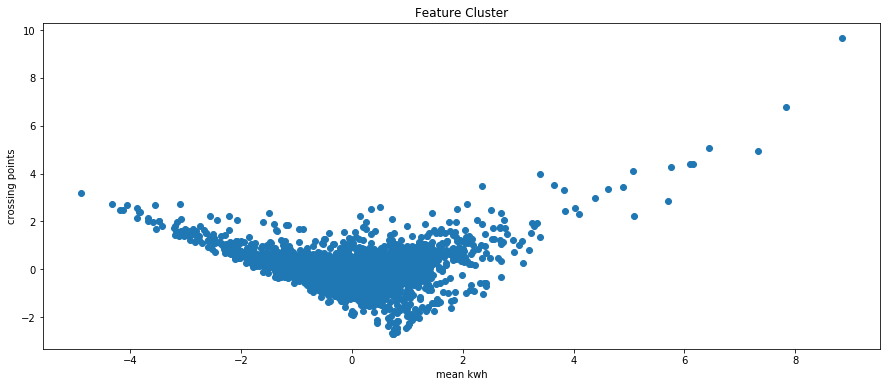

In [34]:
plt.figure(figsize=(15,6))
plt.title('Feature Cluster')
plt.ylabel('crossing points')
plt.xlabel('mean kwh')
plt.scatter(transformed_features[:,0], transformed_features[:,1])


In [20]:
kmeans = KMeans(n_clusters= 4, random_state=0)
kmeans.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

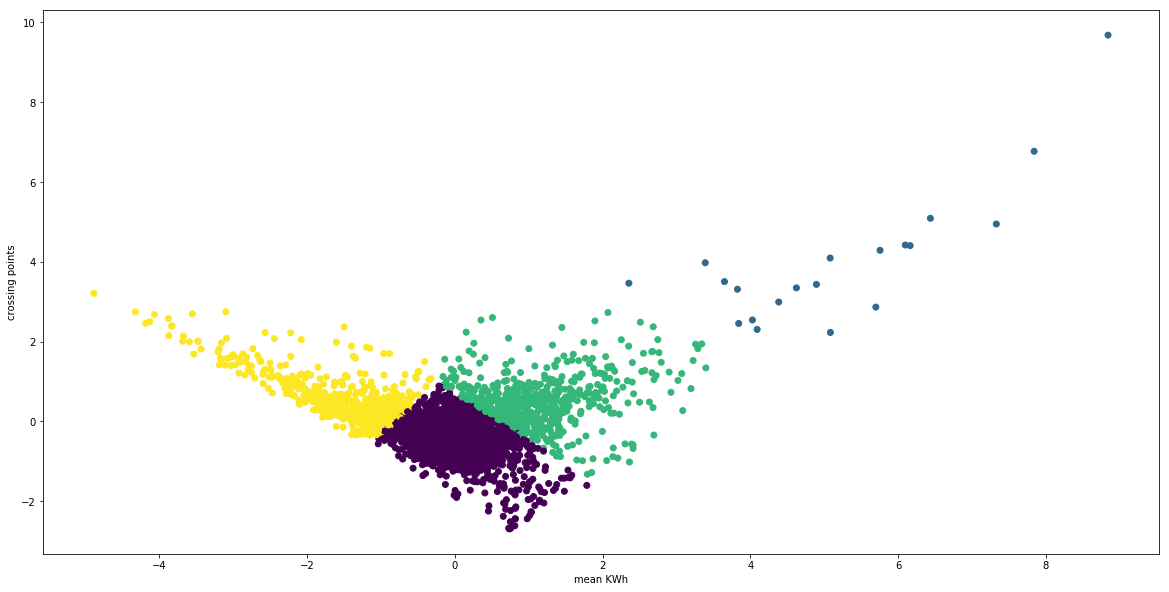

In [42]:
plt.ylabel('crossing points')
plt.xlabel('mean KWh')
plt.scatter(transformed_features[:,0], transformed_features[:,1], c= kmeans.labels_)

In [38]:
features_scaled_df['labels'] = kmeans.labels_

/home/sianbhushan/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sianbhushan/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


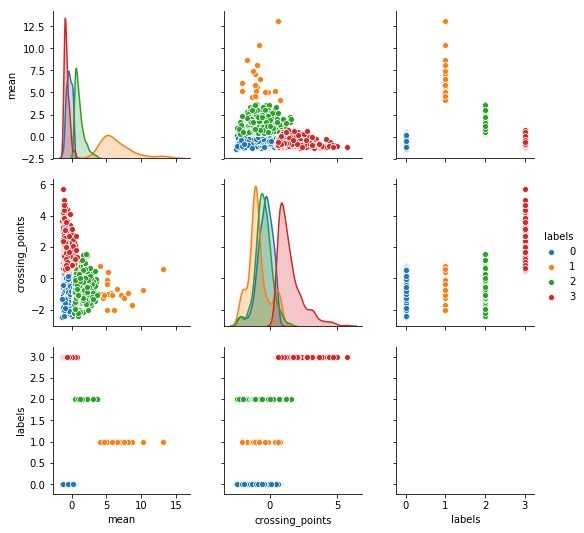

In [25]:
import seaborn as sns
sns.pairplot(features_scaled_df, hue='labels')

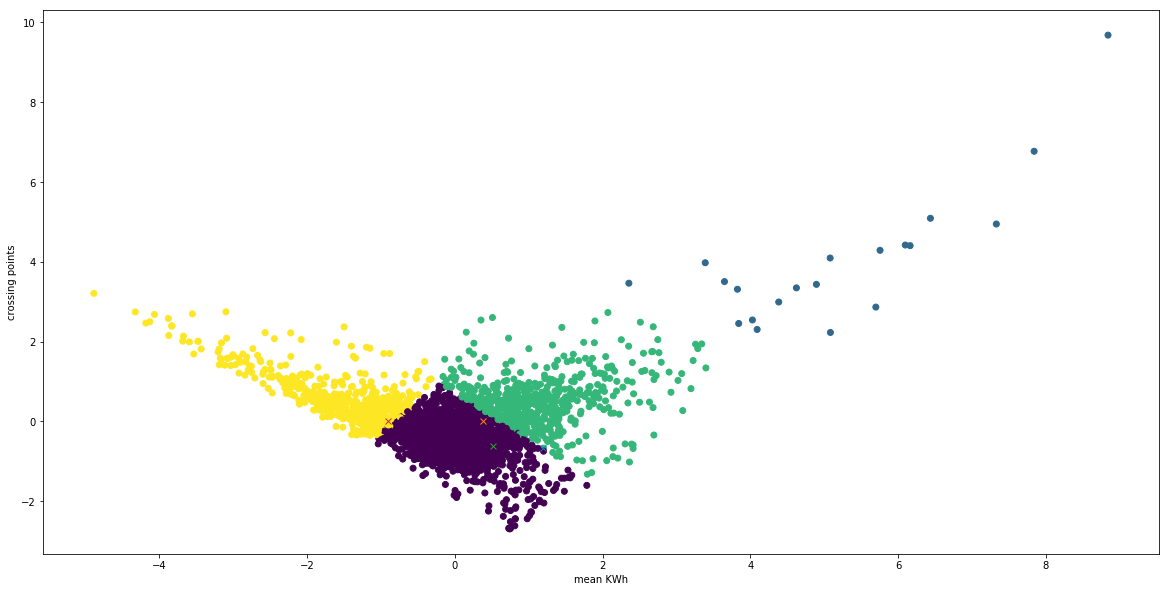

In [43]:
plt.ylabel('crossing points')
plt.xlabel('mean KWh')
plt.scatter(transformed_features[:,0], transformed_features[:,1], c= kmeans.labels_)

rep_0 = pca.transform([features_scaled_df.loc['MAC000022'][feature_labels]])
plt.plot(rep_0[:,0], rep_0[:,1], marker = 'x')

rep_1 = pca.transform([features_scaled_df.loc['MAC000002'][feature_labels]])
plt.plot(rep_1[:,0], rep_1[:,1], marker = 'x')

rep_2 = pca.transform([features_scaled_df.loc['MAC005551'][feature_labels]])
plt.plot(rep_2[:,0], rep_2[:,1], marker = 'x')

rep_3 = pca.transform([features_scaled_df.loc['MAC005567'][feature_labels]])
plt.plot(rep_3[:,0], rep_3[:,1], marker = 'x')